## Atividade 1
Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# reduzir número de casas decimais dos floats
pd.set_option('display.precision', 2)

# remover notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

caminho = './'
arquivo = 'dataset_bancomundial.csv'

df_dados = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de um único termo em uma coluna
filtro = ['GDP (Current USD)']
# filtrando apenas as linhas que contém o critério do filtro na coluna Indicator Name
df_gpd = df_dados.query("`Indicator Name` in @filtro")

print("Antes de remover haviam essas colunas.")
display(df_gpd.head(0))

df_gpd = df_gpd.drop(['Indicator Name', 'Indicator Code', 'index'], axis = 1)
print("Depois de removido há as seguintes colunas.")
display(df_gpd.head(0))

# gravando em um novo arquivo
df_gpd.to_csv('dataset_gpd_ex1.csv', sep = ';', decimal = ',')


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [179]:
arquivo = 'dataset_bancomundial_paises.csv'

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

# lendo o arquivo
df_paises = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de varios termos em uma coluna
df_paises_sul_americanos = df_paises.query("`Country Code` in @filtro_paises_sul_americanos")

df_paises_sul_americanos.reset_index(inplace=True)

# criando arquivo com dataframe
df_paises_sul_americanos.to_csv('dataset_paises_sul_americanos_ex2.csv', sep = ';', decimal = ',')

df_paises_sul_americanos.head(4)

,level_0,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,6,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.00,2013.00,2011.00
1,21,21,BOL,Bolivia,Bolivia,Plurinational State of Bolivia,BO,Bolivian Boliviano,NaN,Latin America & Caribbean,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2008","Integrated household survey (IHS), 2012",NaN,2013,NaN,2013.00,2000.00
2,24,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.00,2013.00,2010.00
3,36,36,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,NaN,2013.00,2006.00


## Atividade 3
Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países da América do Sul;

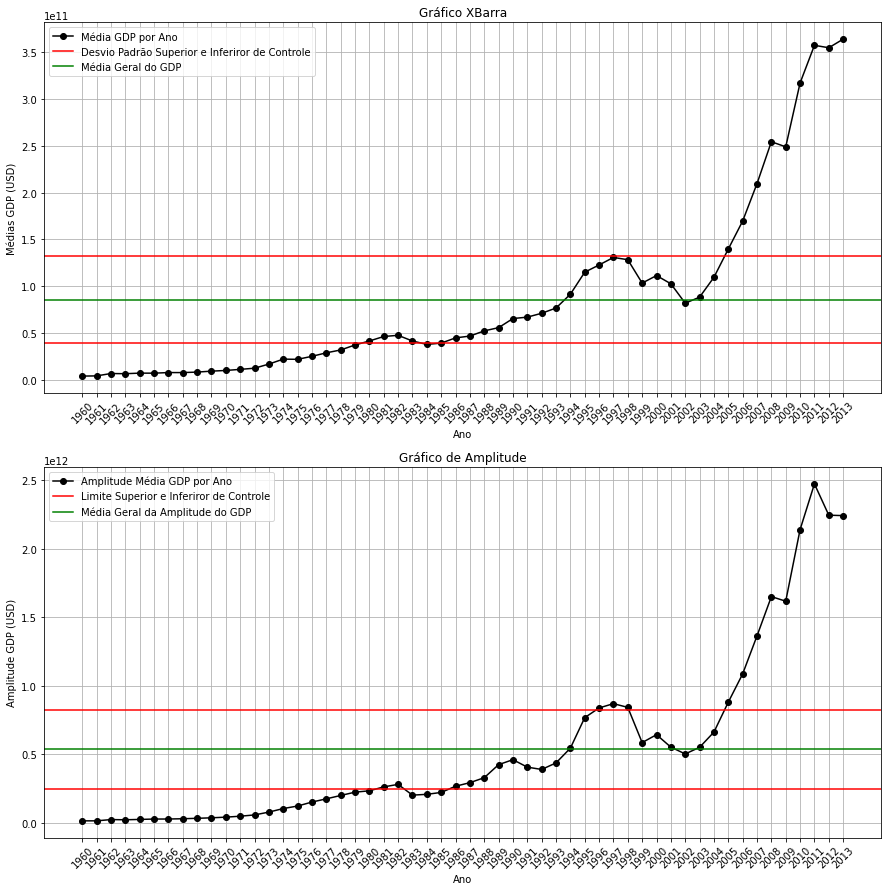

In [180]:
filtro_cod_sul_americanos = df_paises_sul_americanos['Country Code']
MULTIPLICADOR_DESVIO_PADRAO = 2
arquivo2 = 'fatores_grafico_controle.csv'

df_fatores = pd.read_csv(caminho + arquivo2, sep=',', decimal='.')
df_fatores = df_fatores.set_index('Amostras')

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros_paises_sul_americanos = df_gpd.query(
    "`Country Code` in @filtro_cod_sul_americanos")

# gravando arquivo csv separado com gdp apenas dos países sul_americanos
df_registros_paises_sul_americanos.to_csv(
    'dataset_gpd_paises_sul_americanos_ex3.csv', sep=';', decimal=',')

df_registros_paises_sul_americanos.reset_index(inplace = True)

# apagando colunas
df_registros_paises_sul_americanos = df_registros_paises_sul_americanos.drop(
    ['index', 'Country Name', 'Country Code'], axis=1)

def buscando_constante_a2(quantidade_elementos: int):
    if(quantidade_elementos > 25):
        quantidade_elementos = 25
    return df_fatores['A2'][quantidade_elementos]

def buscando_constante_d3(quantidade_elementos: int):
    if(quantidade_elementos > 25):
        quantidade_elementos = 25
    return df_fatores['D3'][quantidade_elementos]

def buscando_constante_d4(quantidade_elementos: int):
    if(quantidade_elementos > 25):
        quantidade_elementos = 25
    return df_fatores['D4'][quantidade_elementos]

def limite_controle_grafico_x(serie_dados: pd.Series, serie_desvio_padrao: pd.Series, limite_superior: bool, multiplicador_desvio_padrao: float = 1.0):
    media_valores = serie_dados.mean()
    media_desvio_padrao = serie_desvio_padrao.mean()
    a2 = buscando_constante_a2(serie_dados.shape[0])
    if(limite_superior == True):
        return media_valores + a2 * media_desvio_padrao * multiplicador_desvio_padrao
    else:
        return media_valores - a2 * media_desvio_padrao * multiplicador_desvio_padrao

def limite_controle_grafico_r(serie_amplitude: pd.Series, limite_superior : bool):
    d3 = buscando_constante_d3(serie_amplitude.shape[0])
    d4 = buscando_constante_d4(serie_amplitude.shape[0])
    media_amplitudes = serie_amplitude.mean()
    if(limite_superior == True):
        return d4 * media_amplitudes
    else:
        return d3 * media_amplitudes

def gerando_grafico_controle(df_registros: pd.DataFrame):
    
    # médias anuais
    medias_GDP = df_registros.mean(numeric_only=True, skipna=True, axis=0)

    # amplitudes anuais
    amplitudes_GDP = df_registros.max(numeric_only=True, skipna=True,
                                      axis=0) - df_registros.min(numeric_only=True, skipna=True, axis=0)

    # desvio padrão anuais
    desvios_GDP = df_registros.std(numeric_only=True, skipna=True, axis=0)

    # nome das colunas
    rotulo_colunas = df_registros.columns

    # Plot x-bar and r charts
    fig, axs = plt.subplots(2, figsize=(15, 15))

    # x-bar chart
    axs[0].plot(rotulo_colunas, medias_GDP, linestyle='-', marker='o', color='black')
    axs[0].axhline(limite_controle_grafico_x(
        medias_GDP, desvios_GDP, True, MULTIPLICADOR_DESVIO_PADRAO), color='red')
    axs[0].axhline(medias_GDP.mean(), color='green')
    axs[0].axhline(limite_controle_grafico_x(
        medias_GDP, desvios_GDP, False, MULTIPLICADOR_DESVIO_PADRAO), color='red')
    axs[0].grid()
    axs[0].set_title('Gráfico XBarra')
    axs[0].set_xlabel('Ano')
    axs[0].set_ylabel('Médias GDP (USD)')
    axs[0].xaxis.set_tick_params(rotation = 45)
    axs[0].legend(['Média GDP por Ano',
                   'Desvio Padrão Superior e Inferiror de Controle', 'Média Geral do GDP'])

    # r-chart
    axs[1].plot(rotulo_colunas, amplitudes_GDP, linestyle = '-', marker = 'o', color = 'black')
    axs[1].axhline(limite_controle_grafico_r(amplitudes_GDP, True), color='red')
    axs[1].axhline(amplitudes_GDP.mean(), color='green')
    axs[1].axhline(limite_controle_grafico_r(amplitudes_GDP, False), color='red')
    axs[1].grid()
    axs[1].set_title('Gráfico de Amplitude')
    axs[1].set_xlabel('Ano')
    axs[1].set_ylabel('Amplitude GDP (USD)')
    axs[1].xaxis.set_tick_params(rotation=45)
    axs[1].legend(['Amplitude Média GDP por Ano',
                'Limite Superior e Inferiror de Controle', 'Média Geral da Amplitude do GDP'])
    plt.show()


gerando_grafico_controle(df_registros_paises_sul_americanos)


## Exercício 4
Identifique os anos e os países que se encontram fora da faixa de controle;

In [232]:

limite_superior = limite_controle_grafico_x(df_registros_paises_sul_americanos.mean(), df_registros_paises_sul_americanos.std(), True, MULTIPLICADOR_DESVIO_PADRAO)
# print(limite_superior)
limite_inferior = limite_controle_grafico_x(df_registros_paises_sul_americanos.mean(), df_registros_paises_sul_americanos.std(), False, MULTIPLICADOR_DESVIO_PADRAO)
# print(limite_inferior)

fora_faixa_controle = df_registros_paises_sul_americanos.apply(
    (lambda acima: acima >= limite_superior) or (lambda abaixo: abaixo <= limite_inferior))

# colocando rótulo com o código dos países utilizando o índice dos dois dataframes como chave
fora_faixa_controle = fora_faixa_controle.merge(
    filtro_cod_sul_americanos, left_index=True, right_index=True)

# # setando o código dos países como
fora_faixa_controle.set_index('Country Code', inplace=True)

# # resentando o índice coloca novamente Country Code como coluna
fora_faixa_controle.reset_index(inplace=True)

display(fora_faixa_controle)
# # mostrar os anos em que cada país ficou fora dos limites de controle
# display(fora_faixa_controle)

for pais in filtro_cod_sul_americanos:
    linha = fora_faixa_controle[fora_faixa_controle['Country Code'] == pais]
    anos = linha[linha[:] == True].dropna(axis=1).head(0)
    quant = anos.shape[1]
    display(pais + " - Quantidade de anos fora da faixa de controle: " +  str(quant), anos)


,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,ARG,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,BOL,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,BRA,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,CHL,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
4,COL,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
5,ECU,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,GUY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,PRY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,PER,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
9,SUR,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


'ARG - Quantidade de anos fora da faixa de controle: 22'

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


'BOL - Quantidade de anos fora da faixa de controle: 0'

""


'BRA - Quantidade de anos fora da faixa de controle: 38'

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


'CHL - Quantidade de anos fora da faixa de controle: 8'

,2006,2007,2008,2009,2010,2011,2012,2013


'COL - Quantidade de anos fora da faixa de controle: 9'

,2005,2006,2007,2008,2009,2010,2011,2012,2013


'ECU - Quantidade de anos fora da faixa de controle: 0'

""


'GUY - Quantidade de anos fora da faixa de controle: 0'

""


'PRY - Quantidade de anos fora da faixa de controle: 0'

""


'PER - Quantidade de anos fora da faixa de controle: 4'

,2010,2011,2012,2013


'SUR - Quantidade de anos fora da faixa de controle: 0'

""


'URY - Quantidade de anos fora da faixa de controle: 0'

""


'VEN - Quantidade de anos fora da faixa de controle: 9'

,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Exercício 5

Considerando os países "Brasil", "Uruguai", "Argentina" e "Paraguai", assim denomidados de países do ConeSul, crie um dataset que envolva apenas o indicador GDP e persista em um arquivo.

In [182]:
filtro_paises_conesul = ['ARG', 'BRA', 'PRY', 'URY']

# filtrar ocorrencias de varios termos em uma coluna
df_paises_conesul = df_paises.query("`Country Code` in @filtro_paises_conesul")

# criando arquivo com dataframe
df_paises_conesul.to_csv('dataset_paises_conesul_ex5.csv', sep = ';', decimal = ',')
df_paises_conesul.reset_index(inplace=True, drop=True)
df_paises_conesul.head(4)

,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.00,2013.00,2011.00
1,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.00,2013.00,2010.00
2,152,PRY,Paraguay,Paraguay,Republic of Paraguay,PY,Paraguayan guarani,National accounts data have been revised from ...,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2013",NaN,2008,2002.00,2013.00,2012.00
3,207,URY,Uruguay,Uruguay,Oriental Republic of Uruguay,UY,Uruguayan peso,"In 2011, the Central Bank revised national acc...",Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012/13","Integrated household survey (IHS), 2013",Yes,2011,2009.00,2013.00,2000.00


## Exercício 6

Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países do ConeSul, com a mesma abordagem descrita no item 3;

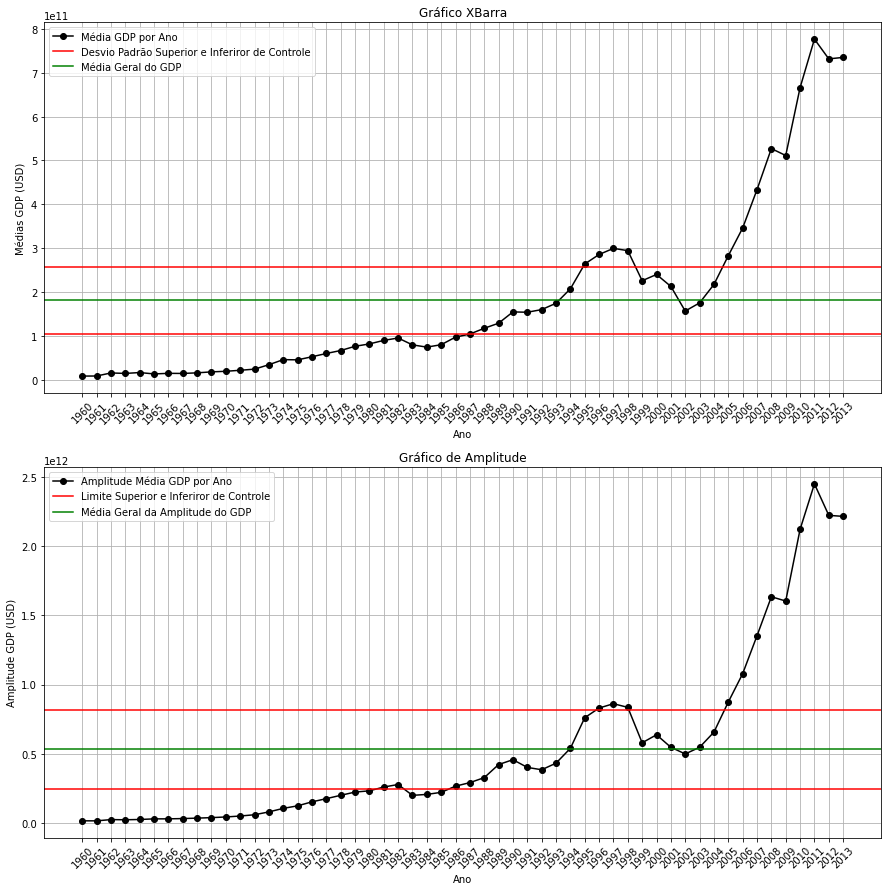

In [183]:
filtro_cod_conesul = df_paises_conesul['Country Code']

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros_paises_conesul = df_gpd.query(
    "`Country Code` in @filtro_cod_conesul")

df_registros_paises_conesul.reset_index(inplace = True)

# apagando colunas
df_registros_paises_conesul = df_registros_paises_conesul.drop(
    ['index', 'Country Name', 'Country Code'], axis=1)

gerando_grafico_controle(df_registros_paises_conesul)

## Exercício 7
Identifique os anos e os países que se encontram foram da faixa de controle

In [233]:
limite_superior = limite_controle_grafico_x(df_registros_paises_conesul.mean(), df_registros_paises_conesul.std(), True, MULTIPLICADOR_DESVIO_PADRAO)
# print(limite_superior)
limite_inferior = limite_controle_grafico_x(df_registros_paises_conesul.mean(), df_registros_paises_conesul.std(), False, MULTIPLICADOR_DESVIO_PADRAO)
# print(limite_inferior)

fora_faixa_controle = df_registros_paises_conesul.apply(
    (lambda acima: acima >= limite_superior) or (lambda abaixo: abaixo <= limite_inferior))

# colocando rótulo com o código dos países utilizando o índice dos dois dataframes como chave
fora_faixa_controle = fora_faixa_controle.merge(
    filtro_cod_conesul, left_index=True, right_index=True)

# # setando o código dos países como
fora_faixa_controle.set_index('Country Code', inplace=True)

# # resentando o índice coloca novamente Country Code como coluna
fora_faixa_controle.reset_index(inplace=True)

display(fora_faixa_controle)
# # mostrar os anos em que cada país ficou fora dos limites de controle
# display(fora_faixa_controle)

for pais in filtro_cod_conesul:
    linha = fora_faixa_controle[fora_faixa_controle['Country Code'] == pais]
    anos = linha[linha[:] == True].dropna(axis=1).head(0)
    quant = anos.shape[1]
    display(pais + " - Quantidade de anos fora da faixa de controle: " +  str(quant), anos)

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,ARG,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1,BRA,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,PRY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,URY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


'ARG - Quantidade de anos fora da faixa de controle: 16'

,1994,1995,1996,1997,1998,1999,2000,2001,2006,2007,2008,2009,2010,2011,2012,2013


'BRA - Quantidade de anos fora da faixa de controle: 30'

,1981,1982,1986,1987,1988,1989,1990,1991,1992,1993,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


'PRY - Quantidade de anos fora da faixa de controle: 0'

""


'URY - Quantidade de anos fora da faixa de controle: 0'

""


## Exercício 8
Descreva as estatísticas sobre o indicador GDP para os países da América do Sul, com uma tabela que contenha o número de medidas válidas, o número de medidas ausentes, a média, o mínimo, o máximo, a mediana, o desvio padrão e a variância do GDP por país

In [250]:
medias = []
desvios = []
minimos = []
maximos = []
medianas = []
variancia = []
validas = ausentes = []
ausentes = []
for indice_linha, coluna in df_registros_paises_sul_americanos.iterrows():
    dados_pais = df_registros_paises_sul_americanos[indice_linha:indice_linha+1]
    medias.append(dados_pais.mean(numeric_only=True, skipna=True, axis=1).values[0])
    desvios.append(dados_pais.std(numeric_only=True, skipna=True, axis=1).values[0])
    minimos.append(dados_pais.min(numeric_only=True, skipna=True, axis=1).values[0])
    maximos.append(dados_pais.max(numeric_only=True, skipna=True, axis=1).values[0])
    medianas.append(dados_pais.median(numeric_only=True, skipna=True, axis=1).values[0])
    variancia.append(dados_pais.var(numeric_only=True, skipna=True, axis=1).values[0])
    ausentes.append(dados_pais.isna().sum(axis=1).values[0])
    validas.append(dados_pais.shape[1] - dados_pais.isna().sum(axis=1).values[0])

dados = pd.DataFrame({'Países': filtro_cod_sul_americanos ,'Médias': medias,  'Desvios': desvios, 'Mínimos': minimos, 'Máximos' : maximos, 'Medianas': medianas, 'Variância': variancia, 'Válidas': validas, 'Ausentes': ausentes })

display(dados)

,Países,Médias,Desvios,Mínimos,Máximos,Medianas,Variância,Válidas,Ausentes
0,ARG,171507871621.60,155457449386.89,18272123664.00,609889000000.00,107456500000.00,24167018569877279473664.00,52,2
1,BOL,6651705273.49,6650163759.29,563110051.90,30601157742.00,5360268398.00,44224678025358516224.00,54,0
2,BRA,536877640321.33,633782863487.84,15165569913.00,2476690000000.00,287883000000.00,401680718050849812643840.00,54,0
3,CHL,59952464841.56,72022194078.85,4211762522.00,277199000000.00,26106610108.00,5187196439931968815104.00,54,0
4,COL,77644261514.70,95709115330.95,4040948305.00,378415000000.00,38848921117.50,9160234757432314691584.00,54,0
5,ECU,22422167177.96,22763944807.68,958598195.00,94472679000.00,17068639523.00,518197183207203143680.00,54,0
6,GUY,716219436.42,689209353.26,170216238.90,2990128821.00,485666666.65,475009532624335296.00,54,0
7,PRY,7008058316.90,6786760667.53,400129691.10,29009411738.00,5237432542.00,46060120358309847040.00,49,5
8,PER,42479508739.20,48912201983.04,2503708501.00,202350000000.00,20613700464.50,2392403502829590806528.00,54,0
9,SUR,1126667285.26,1313296091.10,93850000.00,5298787879.00,773232775.25,1724746622895756032.00,54,0
